In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score

In [2]:
np.random.seed(42)
data = np.vstack([np.random.randn(2000, 2) * 5 + center for center in np.random.randint(10, 100, (5, 2))])

In [3]:
np.random.seed(42)
class KMeans:
    def __init__(self, k = 5, max_iters = 100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None

    def fit(self, data):
        self.centroids = data[np.random.choice(len(data), self.k)]
        for _ in range(self.max_iters):
            labels = np.argmin(np.linalg.norm(data[:, None] - self.centroids, axis = 2), axis = 1)
            new_centroids = np.array([data[labels == i].mean(axis = 0) for i in range(self.k)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        self.labels = labels

    def compute_wcss(self, data):
        return sum(np.sum((data[self.labels == i] - centroids)**2) for i, centroids in enumerate(self.centroids))

In [4]:
np.random.seed(42)
wcss = []
silhouette_scores = []
k_values = range(2, 11)

In [5]:
np.random.seed(42)
for k in k_values:
    kmeans = KMeans(k = k)
    kmeans.fit(data)
    wcss.append(kmeans.compute_wcss(data))
    silhouette_scores.append(silhouette_score(data, kmeans.labels))

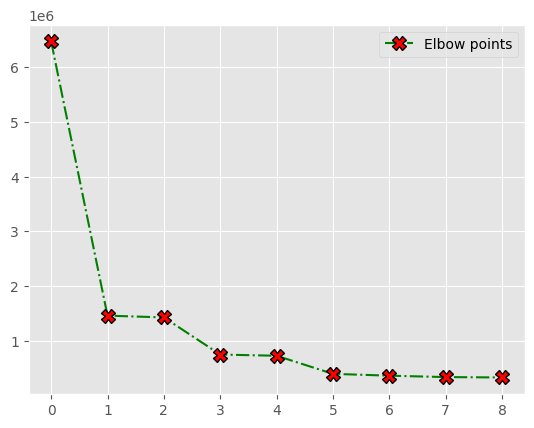

In [6]:
plt.style.use("ggplot")
plt.plot(wcss, marker = "X", markersize = 10, linestyle = "-.", markeredgecolor = "black", c = "g", markerfacecolor = "red", label = "Elbow points")
plt.grid("off")
plt.legend()

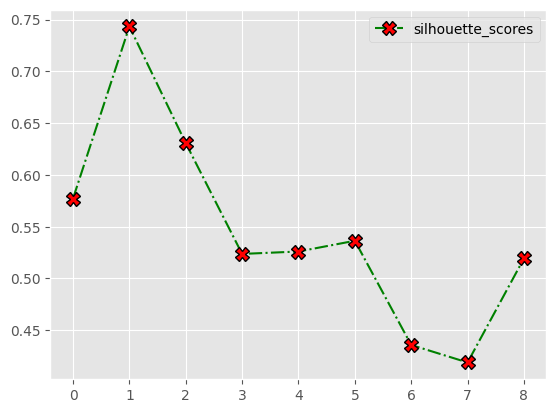

In [7]:
plt.plot(silhouette_scores, marker = "X", markersize = 10, linestyle = "-.", markeredgecolor = "black", c = "g", markerfacecolor = "red", label = "silhouette_scores")
plt.grid("off")
plt.legend()

In [8]:
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_silhouette_score = max(silhouette_scores)

In [9]:
optimal_k, optimal_silhouette_score

(3, 0.743282895690872)

In [10]:
np.random.seed(42)
kmeans = KMeans(k = optimal_k)
kmeans.fit(data)

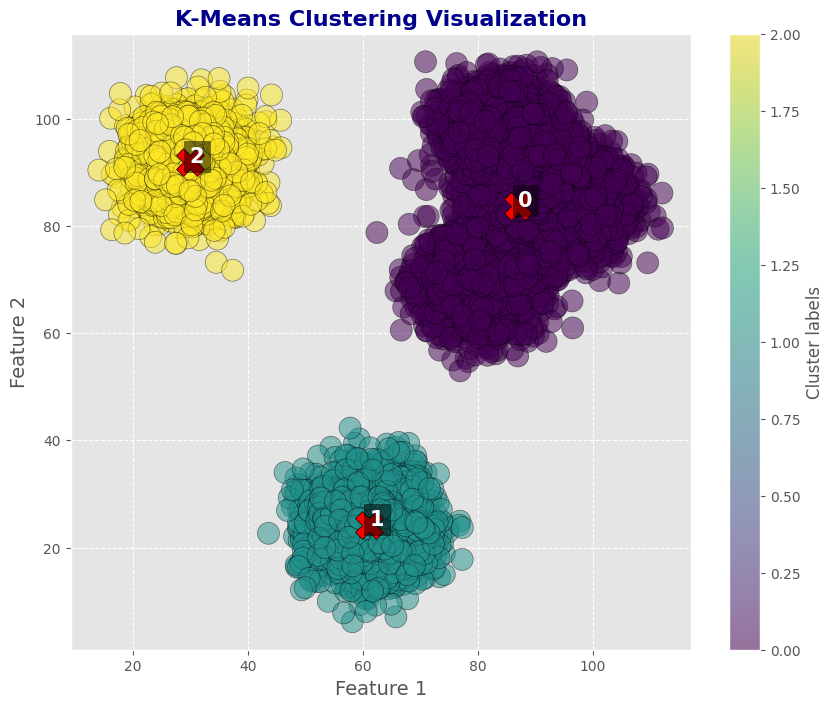

In [28]:
np.random.seed(42)
plt.figure(figsize = (10, 8))
color = plt.scatter(data[:, 0], data[:, 1], c = kmeans.labels, cmap = "viridis", s = 250, edgecolor = "black", alpha = 0.5)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker = "X", s = 400, edgecolor = "black", c = "r")
for i, (x, y) in enumerate(kmeans.centroids):
    plt.text(x, y, f"{i}", fontsize = 15, fontweight = "bold", color = "white", bbox = dict(edgecolor = "black", facecolor = "black", alpha = 0.5))
colorbar = plt.colorbar(color)
colorbar.set_label("Cluster labels")
plt.title("K-Means Clustering Visualization", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.grid(linestyle = "--")

In [29]:
import pandas as pd 
df = pd.read_csv("student_clustering.tsv", sep = "\t")

In [30]:
df.head()

,cgpa,ML
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [34]:
cols = df.columns

In [36]:
wcss = []
silhouette_scores = []
k_values = range(2, 11)

In [40]:
for k in k_values:
    kmeans = KMeans(n_clusters = k, max_iter = 300, init = "k-means++", random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

D:\Code\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Code\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Code\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Code\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

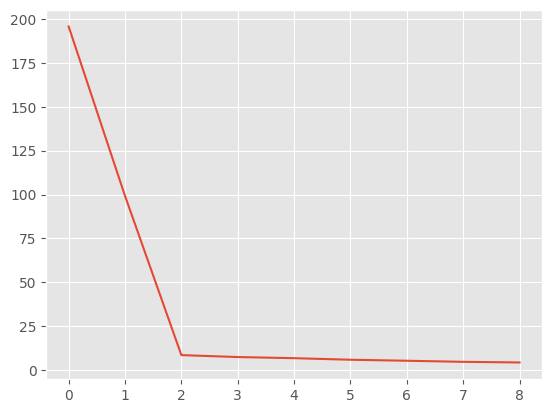

In [42]:
plt.plot(wcss)

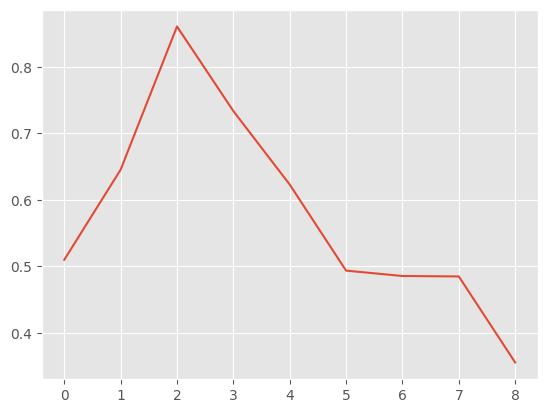

In [43]:
plt.plot(silhouette_scores)

In [44]:
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_silhouette_score = max(silhouette_scores)

In [45]:
optimal_k, optimal_silhouette_score

(4, 0.8605024348886897)

In [46]:
kmeans = KMeans(n_clusters = optimal_k, max_iter = 300, init = "k-means++")
df["Clusters"] = kmeans.fit_predict(scaled_data)

D:\Code\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
df.head()

,cgpa,ML,Clusters
0,5.13,88,2
1,5.90,113,0
2,8.36,93,3
3,8.27,97,3
4,5.45,110,0


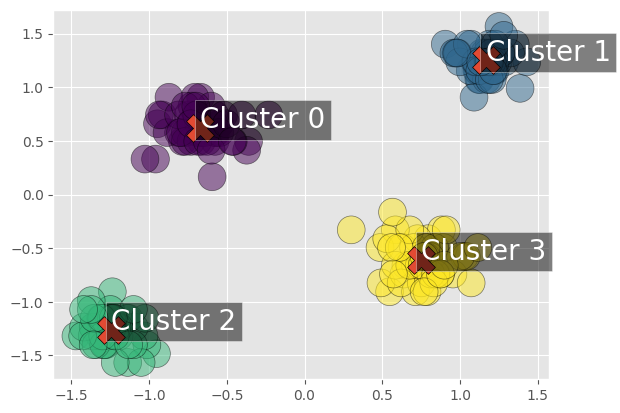

In [69]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c = df["Clusters"], s = 400, edgecolor = "black", alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = "X", s = 400, edgecolor = "black")
for i, (x, y) in enumerate(kmeans.cluster_centers_):
    plt.text(x, y, f"Cluster {i}", fontsize = 20, color = "white", bbox = dict(edgecolor = "white", alpha = 0.5, facecolor = "black"))